In [4]:
#pip install pygam

In [38]:
# import packages
import pandas as pd
import matplotlib.pyplot as plt
from pygam import LogisticGAM

#load the breast cancer data set
from sklearn.model_selection import train_test_split
from sklearn.datasets import load_breast_cancer
data = load_breast_cancer()

In [39]:
#keep first 6 features for simplicity & add target \
df = pd.DataFrame(data.data, columns=data.feature_names)[['mean radius', 'mean texture', 'mean perimeter', 'mean area','mean smoothness', 'mean compactness']]
target_df = pd.Series(data.target)
df.describe()

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness
count,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000
mean,14.127292,19.289649,91.969033,654.889104,0.096360,0.104341
std,3.524049,4.301036,24.298981,351.914129,0.014064,0.052813
min,6.981000,9.710000,43.790000,143.500000,0.052630,0.019380
25%,11.700000,16.170000,75.170000,420.300000,0.086370,0.064920
50%,13.370000,18.840000,86.240000,551.100000,0.095870,0.092630
75%,15.780000,21.800000,104.100000,782.700000,0.105300,0.130400
max,28.110000,39.280000,188.500000,2501.000000,0.163400,0.345400


Lets use the defalt paramiters to fit the data

In [41]:
X = df[['mean radius', 'mean texture', 'mean perimeter', 'mean area','mean smoothness', 'mean compactness']]
y = target_df

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)
#Fit a model with the default parameters
gam = LogisticGAM().fit(X_train, y_train)
gam.summary()

LogisticGAM                                                                                               
=============================================== ==========================================================
Distribution:                      BinomialDist Effective DoF:                                     19.1231
Link Function:                        LogitLink Log Likelihood:                                   -34.5105
Number of Samples:                          381 AIC:                                               107.267
                                                AICc:                                             109.6293
                                                UBRE:                                               2.3217
                                                Scale:                                                 1.0
                                                Pseudo R-Squared:                                   0.8637
Feature Function                  Lam

C:\Users\anthony.gonzalez\AppData\Local\Temp\ipykernel_4800\3840592158.py:7: UserWarning: KNOWN BUG: p-values computed in this summary are likely much smaller than they should be. 
 
Please do not make inferences based on these values! 

Collaborate on a solution, and stay up to date at: 
github.com/dswah/pyGAM/issues/163 

  gam.summary()


In [42]:
gam.accuracy(X_test, y_test)

0.9574468085106383

Off the top we get an accuracy of .957 which is great, but how can we improve this? 

GAM's allow for easy explorion and interpretion individual features, it does this by holding the other features to it's mean can caculating partial dependance. By ploting this for each of the variables we can get an idea of how each independand variable effects the target. 

<Figure size 432x288 with 0 Axes>

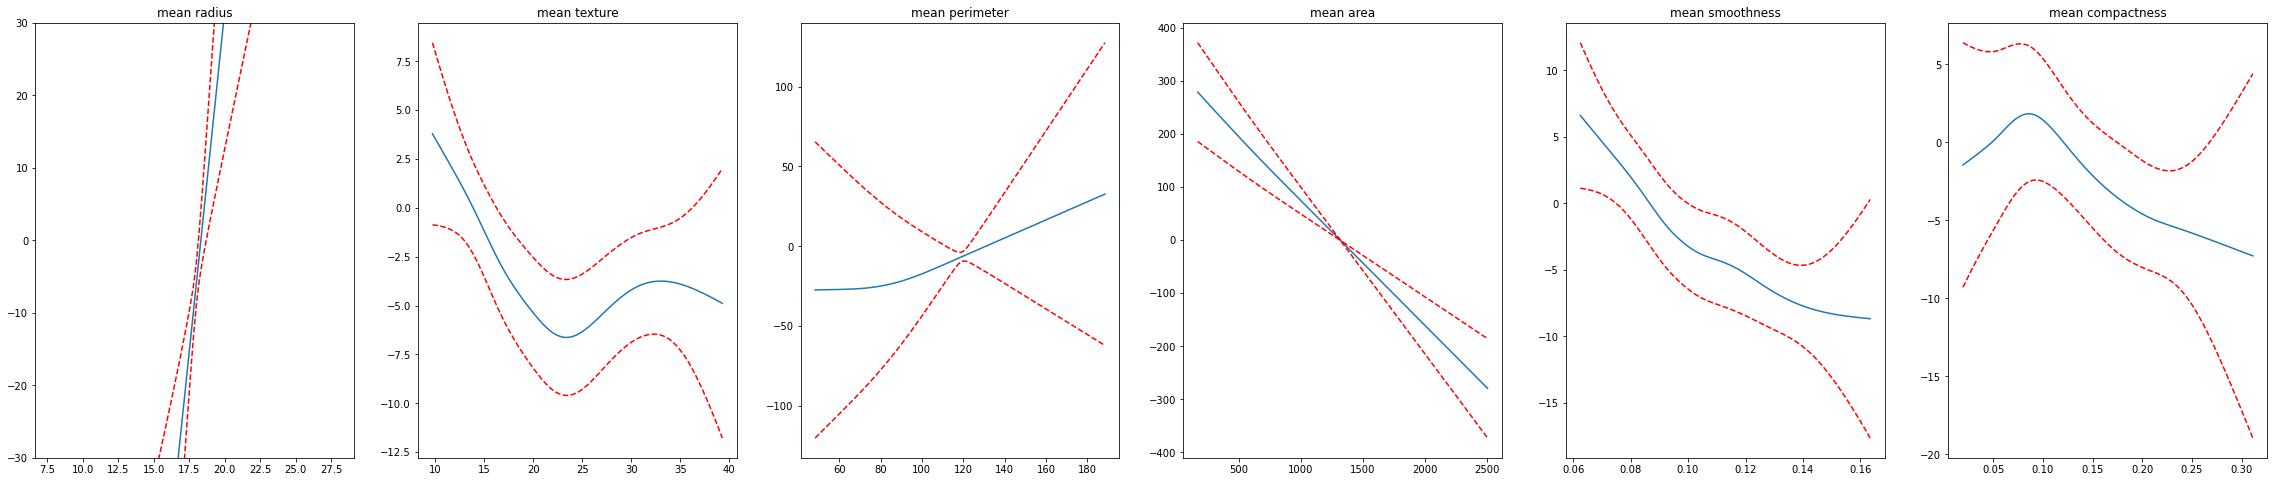

In [43]:
titles = df.columns
plt.figure()
fig, axs = plt.subplots(1,len(df.columns),figsize=(40, 8))
for i, ax in enumerate(axs):
    XX = gam.generate_X_grid(term=i)
    ax.plot(XX[:, i], gam.partial_dependence(term=i, X=XX))
    ax.plot(XX[:, i], gam.partial_dependence(term=i, X=XX,   width=.95)[1], c='r', ls='--')
    if i == 0:
        ax.set_ylim(-30,30)
    ax.set_title(titles[i])